In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# `Ridge Regression`

### ------------------------------------------------------------------------------------------------

# Overview 

 **Goal**: predict the behavior of a continuous _endogenous_ variable given its corresponding _exogenous_ variables, under the constraint that we are penalizing based on coefficient magnitudes when solving for said coefficients. This setup allows for models that are less prone to over-fitting than simple OLS models are.
 
 **Model**: $y = X{\beta} + {\epsilon}$

**Terms**:
- $y$: vector of endogenous values
- $X$: matrix of exogenous values
- $\beta$: vector of coefficients for exogenous variables
- $\epsilon$: a representation of the random errors or fluctuations around the predicted line or plane

**Functionality**:
- $y$ is the result of taking the matrix product of $\beta$ and $X$
- i.e. each row in $y$ is the sum of the products, for that row, of each value of $X$ with its corresponding $\beta$

**Basic example**:
- *endogenous*: price of an apartment
- *exogenous*: square footage (1), number of rooms (2)
- $y = \beta_{0} + \beta_{1} * X_{1} + \beta_{2} * X_{2} + \epsilon$
- i.e. $constant + coefficient_{1} * area + coefficient_{2} * rooms$

### ------------------------------------------------------------------------------------------------

# Tikhonov regularization

$\displaystyle \min _{\beta }\,(\mathbf {y} -\mathbf {X} \beta )^{\mathsf {T}}(\mathbf {y} -\mathbf {X} \beta )+\lambda (\beta ^{\mathsf {T}}\beta -c)$

$\displaystyle {\hat {\beta }}_{R}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} +\lambda \mathbf {I} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y}$

### ------------------------------------------------------------------------------------------------

# Parameter Estimation - OLS

**Goal**: given $X$ and $y$, find $\beta$

**Method**: there exist many ways to reach our goal - we will start with Ordinary Least Squares (OLS)

(notes written with support from [Wikipedia](https://en.wikipedia.org/wiki/Ordinary_least_squares) and [ESL](http://web.stanford.edu/~hastie/ElemStatLearn/))

### Background

- to measure the distance between a response and a predicted response, one can take the difference between the two values
- this would be written as, for the $i^{th}$ data point, $y_{i} - {X_{i}}\beta$ (note that $X_{i}$ is a row of $X$), and is referred to as the _residual_ for this data point

### Overall model fit

- summing the squares of all residuals provides a measure of overall model fit
- sum of squared residuals: $\sum_{i=1}^{n}(y_{i} - \sum_{j=1}^{p}{X_{i, j}\beta_{j})}^{2} = {(y-X\beta)}^{T}(y-X\beta)$

### Estimate Beta

- if we find the values of $\beta$ that minimize the sum of the squared residuals, we have found the model coefficients that provide the best fit
- to find the values of $\beta$ that minimize ${(y-X\beta)}^{T}(y-X\beta)$ we need to first differentiate with respect to $\beta$, yielding a first derivative $-2X^{T}(y - X\beta)$
- if we set that first derivate equal to 0, $X^{T}(y - X\beta) = 0$, we can, making some assumptions, solve to:

$$\hat\beta = (X^{T}X)^{-1}X^{T}y$$

- see more on the derivation of OLS regression [here](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf)

### Evaluation

- a commonly used metric for fit assessment is that of $R^{2}$
- this is the ratio of the variance of $\hat{y}$ around the mean of $y$, $\bar{y}$, to the variance of $y$, i.e. the ratio of "explained" to "total" variance of $y$
- which is written as $\large\frac{\sum(\hat{y} - \bar{y})^{2}}{\sum(y - \bar{y})^{2}}$
- useful use of this metric requires the model to include a constant, or $\beta_{0}$, term, in which case 0 < $R^{2}$ < 1, with closer to 1 being better

### ------------------------------------------------------------------------------------------------

# Implementation

In [81]:
class RidgeRegressor:
    """Ridge Regression class, built for NumPy arrays. 
    Fits using lin alg. Always supplies a constant coefficient.
    Very unstable!
    
    (subbing in `alpha` for `lambda` due to the latter's protected status)
    """
    
    def __init__(self, alpha=1):
        self.X = None
        self.y = None
        self.B = None
        self.alpha = alpha
        self.y_hat = None
        
    
    def fit(self, X, y):
        for_coeff = np.ones((X.shape[0], 1))
        X = np.hstack((X, for_coeff))

        self.B = np.linalg.inv(X.T.dot(X) + self.alpha * np.identity(X.shape[1])).dot(X.T).dot(y)
        self.X = X
        self.y = y
    
    
    def predict(self, X):
        if self.B is None:
            return None
        self.y_hat = self.X.dot(self.B)
        return self.y_hat

    
    def r_sqrd(self):
        if self.y is None:
            return None
        elif self.y_hat is None:
            y_hat = self.predict()
            
        y_bar = np.mean(self.y)
        explained = np.sum(np.power(self.y_hat - y_bar, 2))
        total = np.sum(np.power(self.y - y_bar, 2))
        return explained / total

### ------------------------------------------------------------------------------------------------

# Testing

### Generate Fake Data

- with `Ridge`, we are looking to prevent overfitting
- overfitting can happen when a model is too tightly coupled to the sample of the data that it happens to be trained on
- so, to do this right, we need an idea of what the distribution of our population looks like
- then, we need to draw sub-samples that do not represent the population very well

In [39]:
X = np.array([[np.random.normal(loc=_, scale=(_ + 1)) for _ in range(100)] for _ in range(3)])

In [40]:
X = X.T

In [41]:
y = np.array([np.random.normal() for _ in range(100)])

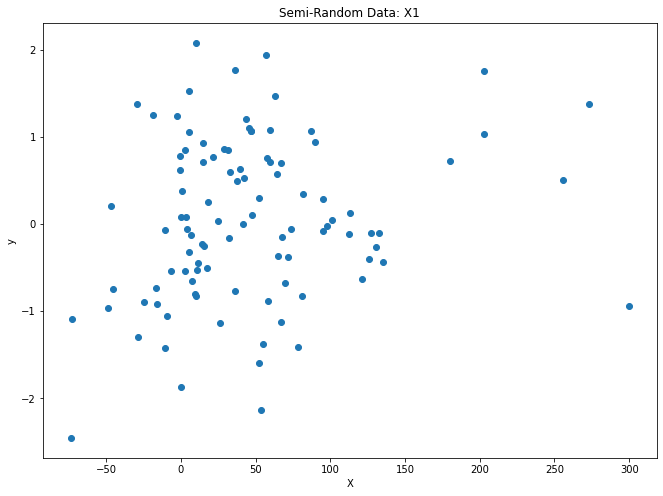

In [42]:
plt.figure(figsize=(11, 8))
ax = plt.scatter(X[:, 0], y)
plt.xlabel("X")
plt.ylabel("y")
t = plt.title("Semi-Random Data: X1")

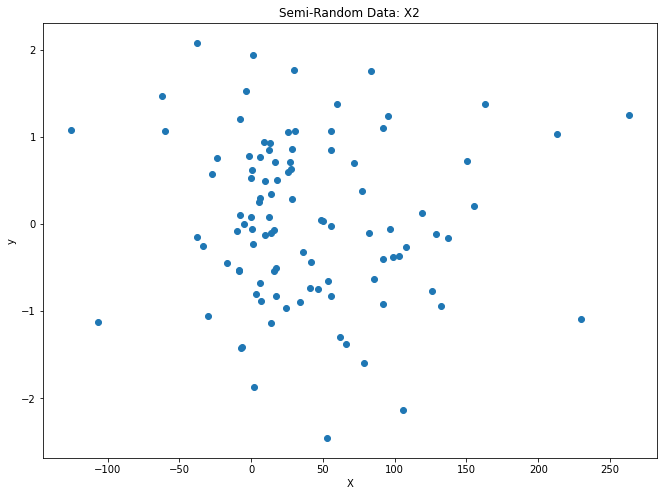

In [43]:
plt.figure(figsize=(11, 8))
ax = plt.scatter(X[:, 1], y)
plt.xlabel("X")
plt.ylabel("y")
t = plt.title("Semi-Random Data: X2")

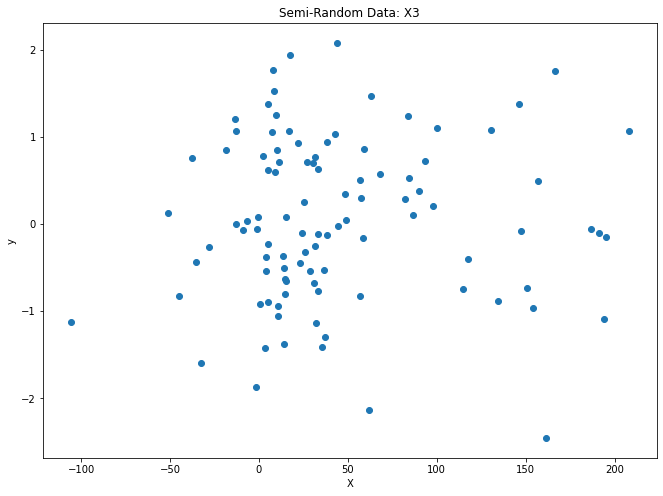

In [45]:
plt.figure(figsize=(11, 8))
ax = plt.scatter(X[:, 2], y)
plt.xlabel("X")
plt.ylabel("y")
t = plt.title("Semi-Random Data: X3")

In [82]:
ridge = RidgeRegressor()

In [83]:
ridge.fit(X, y)

In [85]:
y_hat = ridge.predict(X)

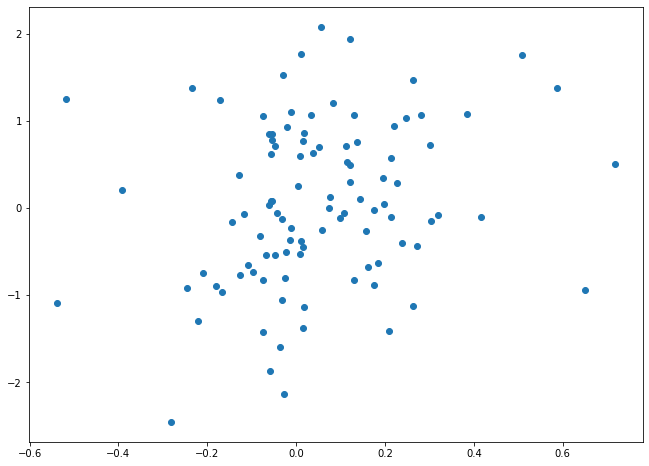

In [88]:
plt.figure(figsize=(11, 8))
ax = plt.scatter(y_hat, y)

In [89]:
ridge.r_sqrd()

0.04894086056104354